# Variable Selection Analysis

## Libraries

In [11]:
import pandas as pd
import datetime as dt
import numpy as np

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

## Dados

In [12]:
selection = pd.read_csv('../data/variables-groups-share.csv')
selection.set_index('Dataset', inplace=True)
selection.drop('Total', axis = 1, inplace = True)
selection

,Production,Labor Market,Sales,Energy,Expectations,International,Public Sector,Prices,Financial,Google Trends
Dataset,,,,,,,,,,
FULL,20,10,19,14,19,9,9,25,20,50
GTC,20,10,19,14,19,9,9,25,20,25
GTW,20,10,19,14,19,9,9,25,20,25
MACRO,20,10,19,14,19,9,9,25,20,0
TFM1-FULL,19,10,17,6,15,7,2,4,7,16
TFM1-GTC,19,10,17,6,15,7,2,4,7,7
TFM1-GTW,19,10,17,6,15,7,2,4,7,9
TFM1-MACRO,19,10,17,6,15,7,2,4,7,0
TFM5-FULL,19,10,18,10,16,7,3,13,10,17


In [13]:
selection_share = (selection.div(selection.sum(axis=1), axis=0)).round(4)
selection_share

,Production,Labor Market,Sales,Energy,Expectations,International,Public Sector,Prices,Financial,Google Trends
Dataset,,,,,,,,,,
FULL,0.1026,0.0513,0.0974,0.0718,0.0974,0.0462,0.0462,0.1282,0.1026,0.2564
GTC,0.1176,0.0588,0.1118,0.0824,0.1118,0.0529,0.0529,0.1471,0.1176,0.1471
GTW,0.1176,0.0588,0.1118,0.0824,0.1118,0.0529,0.0529,0.1471,0.1176,0.1471
MACRO,0.1379,0.0690,0.1310,0.0966,0.1310,0.0621,0.0621,0.1724,0.1379,0.0000
TFM1-FULL,0.1845,0.0971,0.1650,0.0583,0.1456,0.0680,0.0194,0.0388,0.0680,0.1553
TFM1-GTC,0.2021,0.1064,0.1809,0.0638,0.1596,0.0745,0.0213,0.0426,0.0745,0.0745
TFM1-GTW,0.1979,0.1042,0.1771,0.0625,0.1562,0.0729,0.0208,0.0417,0.0729,0.0938
TFM1-MACRO,0.2184,0.1149,0.1954,0.0690,0.1724,0.0805,0.0230,0.0460,0.0805,0.0000
TFM5-FULL,0.1545,0.0813,0.1463,0.0813,0.1301,0.0569,0.0244,0.1057,0.0813,0.1382


In [14]:
selection_share.shape

(20, 10)

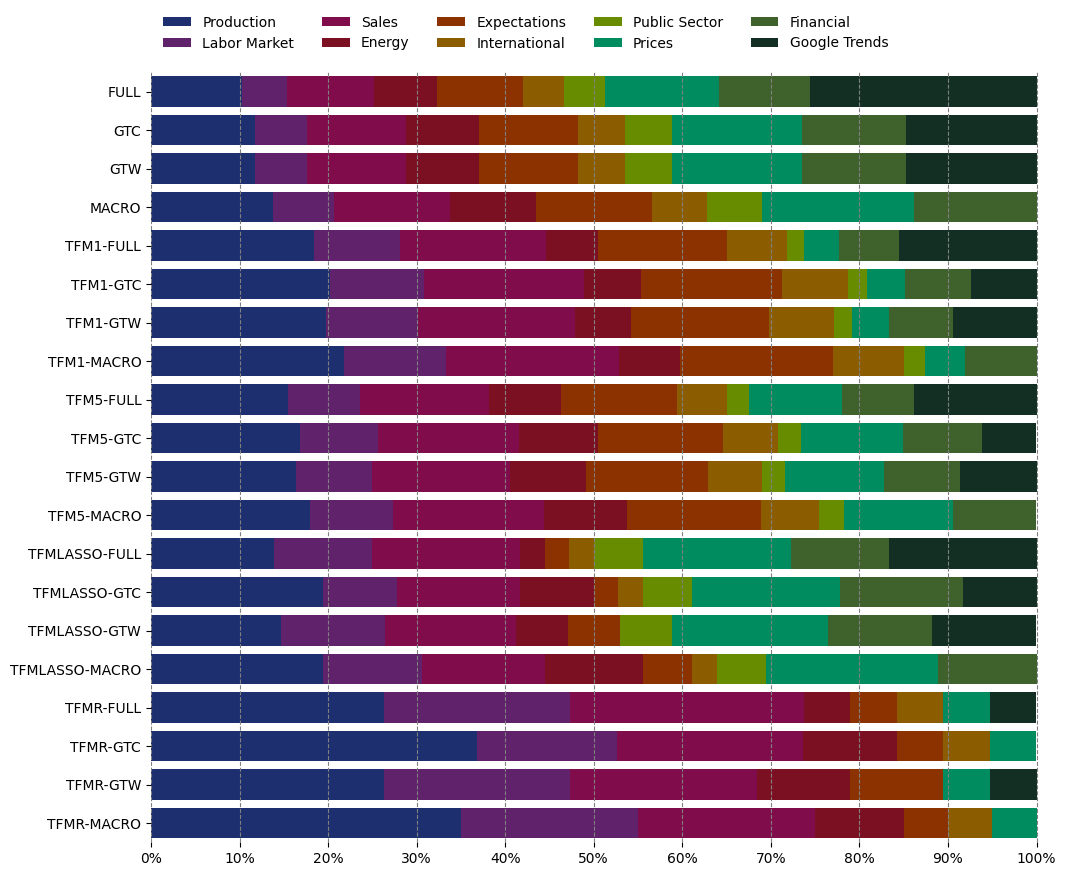

In [15]:
# variables
labels = list(selection_share.columns)
colors = ['#1d2f6f', '#60226a', '#800c4c', '#7c1023', '#8c3200', '#8c5d00', '#688c00', '#008c5f', '#3f612b', '#132f23']
title = ' '

# Definindo a função
def plot_stackedbar_p(df, labels, colors, title):
    fields = df.columns.tolist()
    
    # figure and axis
    fig, ax = plt.subplots(1, figsize=(12, 10))
# plot bars
    left = len(df) * [0]
    for idx, name in enumerate(fields):
        plt.barh(df.index, df[name], left = left, color=colors[idx])
        left = left + df[name]
# title and subtitle
    plt.title(title, loc='left')
# legend
    plt.legend(labels, bbox_to_anchor=([0, 1, 0, 0.09]), loc = 2, ncol=5, frameon=False)
# remove spines
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
# format x ticks
    xticks = np.arange(0,1.1,0.1)
    xlabels = ['{}%'.format(i) for i in np.arange(0,101,10)]
    plt.xticks(xticks, xlabels)
# adjust limits and draw grid lines
    plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
    ax.xaxis.grid(color='gray', linestyle='dashed')
    ax.invert_yaxis()
plt.show()
    
plot_stackedbar_p(selection_share, labels, colors, title)
# plt.savefig('DFM-PLOTS-GTC/DFM-GTC-PCA-Comp-Share.png')